<h1> Orchid Health Metrics Analysis</h1>

<h3>This notebook will give condensed metrics in an identical fashion based on the outputs below. Data (.csv file from excel) simply needs to be linked in the indicated cell, and the following charts and tables can be generated every time within seconds</h3>

In [126]:
#All of the necessary libraries and packages required for this analysis.
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

print ('Libraries Imported!')

Libraries Imported!


In the cell below, attach the .csv file of the excel data by copy and pasting the name in the parantheses. ***The excel files must be identical to the given files for the following commands to work

In [158]:
#After updating with current .csv files, press shift and enter to run the cell and import the data
locdata = pd.read_csv('JHacherl_Copy of MedStatix Patient Expereince Survey - 2020 results - Copy of Locations.csv')
provdata = pd.read_csv('JHacherl_Copy of MedStatix Patient Expereince Survey - 2020 results - Copy of Providers.csv')

print('Data Imported')

Data Imported


In [128]:
#Organizes CLinic data by location and "Metric Group", 
locdata.sort_values(by=['Location', 'Metric Group'], inplace=True)
locdata.reset_index(inplace=True, drop=True)
locdata.head(33) #this line should show the first 33 rows of the .csv file, all of the metrics related to the Estacada clinic

,Location,Metric Group,Metric,Score,Responses
0,ESTACADA CLINIC,Best Practice,Charges Were Reasonable,86.93,303
1,ESTACADA CLINIC,Best Practice,Easy Appointment Scheduling,92.04,422
2,ESTACADA CLINIC,Best Practice,Healthy Choices,91.74,368
3,ESTACADA CLINIC,Best Practice,Hours Work For Patients,92.26,416
4,ESTACADA CLINIC,Best Practice,Pleasant Waiting Area,88.98,285
5,ESTACADA CLINIC,Best Practice,Protecting Patient Privacy,94.20,410
6,ESTACADA CLINIC,Best Practice,Refer Specialist,86.88,218
7,ESTACADA CLINIC,Best Practice,Same Day Appointment,83.96,202
8,ESTACADA CLINIC,Best Practice,Staff Coordinates Care,94.03,372
9,ESTACADA CLINIC,Best Practice,Staff Identified Roles,93.38,399


In [129]:
#This cell creates the first part of the cleaned and slimmed down table that will be used for generating the clinic figure
locdata_M= locdata.drop(columns=['Metric', 'Responses'])
locdata_M

,Location,Metric Group,Score
0,ESTACADA CLINIC,Best Practice,86.93
1,ESTACADA CLINIC,Best Practice,92.04
2,ESTACADA CLINIC,Best Practice,91.74
3,ESTACADA CLINIC,Best Practice,92.26
4,ESTACADA CLINIC,Best Practice,88.98
...,...,...,...
94,OAKRIDGE CLINIC,Respect,94.89
95,OAKRIDGE CLINIC,Respect,95.39
96,OAKRIDGE CLINIC,Respect,93.99
97,OAKRIDGE CLINIC,Respect,95.18


In [131]:
#This cell averages all of the scores for each metric group , and prepares the data for the visualization
clinic_avg = locdata_M.groupby(['Location', 'Metric Group']).mean()
clinic_avg.reset_index(inplace=True)
clinic_avg

,Location,Metric Group,Score
0,ESTACADA CLINIC,Best Practice,90.387273
1,ESTACADA CLINIC,Communication,92.412857
2,ESTACADA CLINIC,Patient Evals,89.751250
3,ESTACADA CLINIC,Respect,94.271429
4,McKenzie River,Best Practice,89.482727
5,McKenzie River,Communication,93.892857
6,McKenzie River,Patient Evals,91.422500
7,McKenzie River,Respect,95.637143
8,OAKRIDGE CLINIC,Best Practice,91.535455
9,OAKRIDGE CLINIC,Communication,93.885714


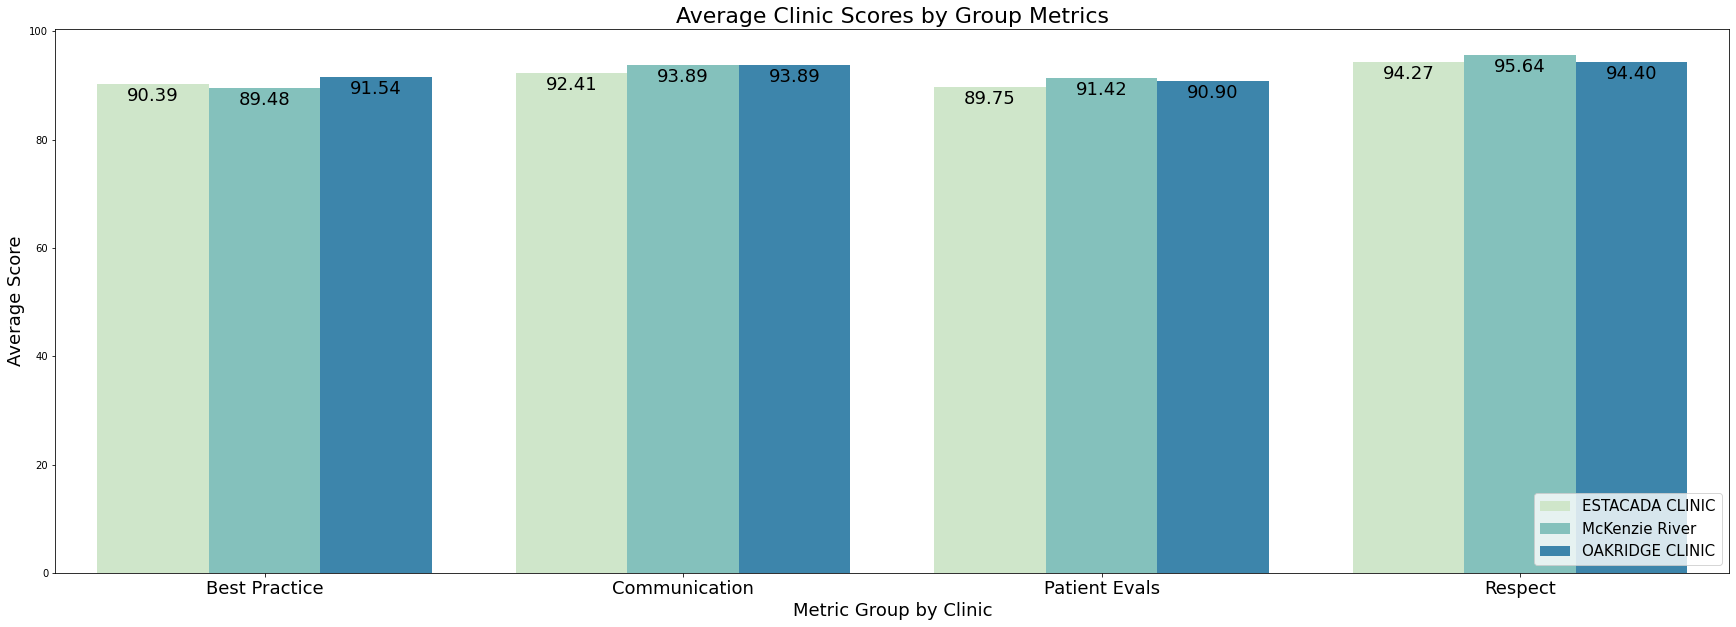

In [132]:
#This cell generates the graph based off of the above table
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[30,10])

splot = sns.barplot(x="Metric Group", y="Score", hue="Location", data=clinic_avg, palette='GnBu')

plt.ylabel("Average Score", size =18)
plt.xlabel("Metric Group by Clinic", size=18)
plt.xticks(fontsize=18)
plt.title("Average Clinic Scores by Group Metrics", size=22)

plt.legend(loc=4, prop={'size':15})

for p in splot.patches:
    splot.annotate(format(round(p.get_height(),2), '0.2f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  color='black', ha='center', va='center', size=18,
                  xytext=(0, -12),
                  textcoords='offset points')
    
plt.savefig('OrchidClinicScores.png')
plt.show()

In [159]:
#This cell performs all of the necessary cleaning for the first part of the analysis, sorting provider by metric group and score
provdata['Metric Group'] = provdata['Unnamed: 1']
provdata.drop(columns=['Unnamed: 1', 'Metric', 'Responses'], inplace=True)
provdata.sort_values(by=['Provider', 'Metric Group'], inplace=True)
provdata.reset_index(inplace=True, drop=True)
provdata.head(33)

,Provider,Score,Metric Group
0,"Andrew White, PA-C",90.53,Best Practice
1,"Andrew White, PA-C",93.77,Best Practice
2,"Andrew White, PA-C",94.18,Best Practice
3,"Andrew White, PA-C",93.59,Best Practice
4,"Andrew White, PA-C",90.78,Best Practice
5,"Andrew White, PA-C",94.38,Best Practice
6,"Andrew White, PA-C",87.92,Best Practice
7,"Andrew White, PA-C",85.50,Best Practice
8,"Andrew White, PA-C",96.40,Best Practice
9,"Andrew White, PA-C",94.90,Best Practice


In [160]:
#This cell performs the averaging and sorting of provider by the four metric groups
Prov_avg = provdata.groupby(['Metric Group', 'Provider']).mean()
Prov_avg.reset_index(inplace=True)
Prov_avg

AttributeError: 'NoneType' object has no attribute 'groupby'

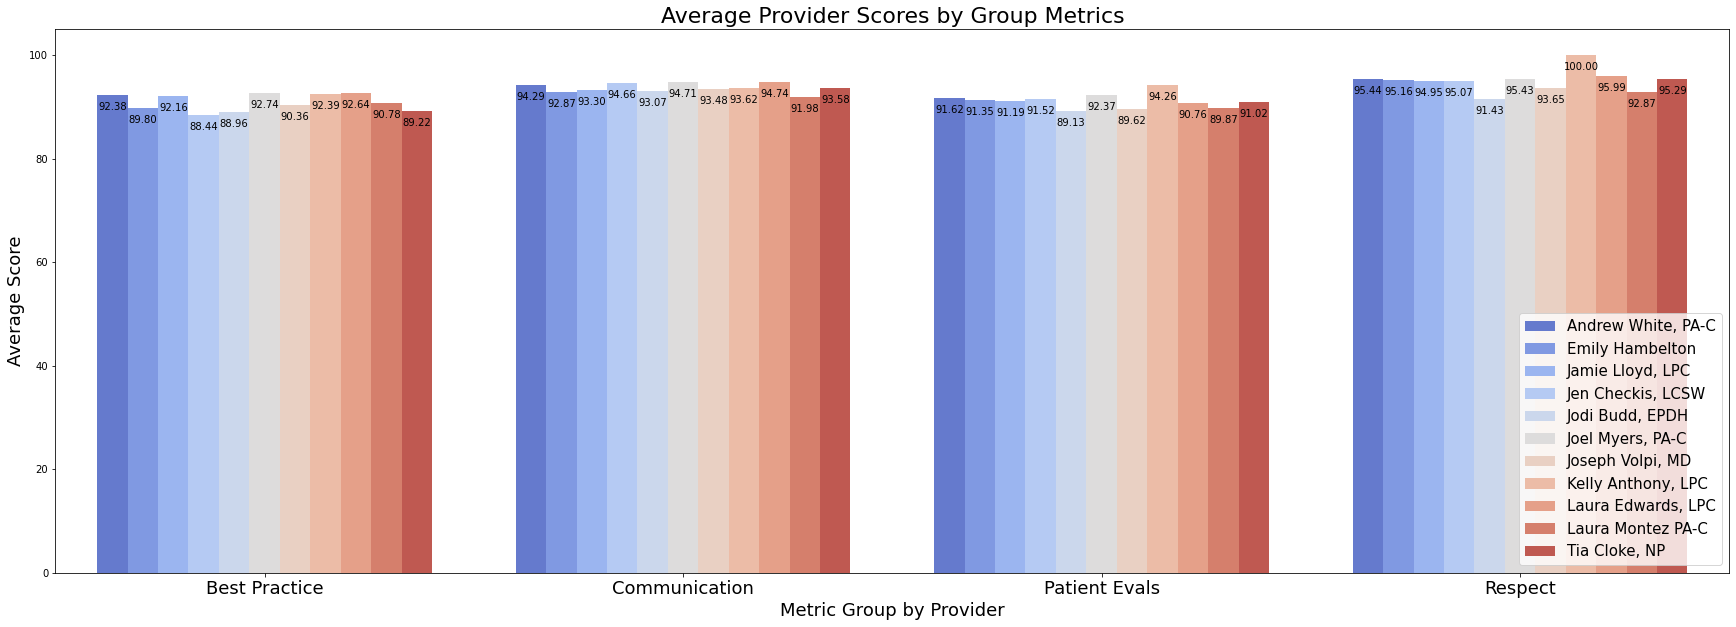

In [135]:
#This cell visualizes teh previous table into the figure below
plt.figure(figsize=[30, 10])

splot = sns.barplot(x="Metric Group", y="Score", hue="Provider", data=Prov_avg, palette='coolwarm')

plt.ylabel("Average Score", size =18)
plt.xlabel("Metric Group by Provider", size=18)
plt.xticks(fontsize=18)
plt.title("Average Provider Scores by Group Metrics", size=22)

plt.legend(loc=4, prop={'size':15})

for p in splot.patches:
    splot.annotate(format(round(p.get_height(),2), '0.2f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  color='black', ha='center', va='center',
                  xytext=(0, -12),
                  textcoords='offset points')
    
plt.savefig('OrchidProviderScores.png')
plt.show()

In [147]:
Estacada_Data = locdata.loc[0:32]
Estacada_Data

,Location,Metric Group,Metric,Score,Responses
0,ESTACADA CLINIC,Best Practice,Charges Were Reasonable,86.93,303
1,ESTACADA CLINIC,Best Practice,Easy Appointment Scheduling,92.04,422
2,ESTACADA CLINIC,Best Practice,Healthy Choices,91.74,368
3,ESTACADA CLINIC,Best Practice,Hours Work For Patients,92.26,416
4,ESTACADA CLINIC,Best Practice,Pleasant Waiting Area,88.98,285
5,ESTACADA CLINIC,Best Practice,Protecting Patient Privacy,94.20,410
6,ESTACADA CLINIC,Best Practice,Refer Specialist,86.88,218
7,ESTACADA CLINIC,Best Practice,Same Day Appointment,83.96,202
8,ESTACADA CLINIC,Best Practice,Staff Coordinates Care,94.03,372
9,ESTACADA CLINIC,Best Practice,Staff Identified Roles,93.38,399


In [152]:
McKenzieRiver_Data = locdata.loc[33:65]
McKenzieRiver_Data

,Location,Metric Group,Metric,Score,Responses
33,McKenzie River,Best Practice,Charges Were Reasonable,85.40,63
34,McKenzie River,Best Practice,Easy Appointment Scheduling,90.44,90
35,McKenzie River,Best Practice,Healthy Choices,89.87,75
36,McKenzie River,Best Practice,Hours Work for Patients,89.43,87
37,McKenzie River,Best Practice,Pleasant Waiting Area,90.67,60
38,McKenzie River,Best Practice,Protecting Patient Privacy,94.82,85
39,McKenzie River,Best Practice,Refer Specialist,86.00,50
40,McKenzie River,Best Practice,Same Day Appointment,84.44,45
41,McKenzie River,Best Practice,Staff Coordinates Care,93.25,77
42,McKenzie River,Best Practice,Staff Identified Roles,93.09,81


In [153]:
Oakridge_Data = locdata.loc[66:98]
Oakridge_Data

,Location,Metric Group,Metric,Score,Responses
66,OAKRIDGE CLINIC,Best Practice,Charges Were Reasonable,89.86,209
67,OAKRIDGE CLINIC,Best Practice,Easy Appointment Scheduling,94.47,282
68,OAKRIDGE CLINIC,Best Practice,Healthy Choices,93.07,254
69,OAKRIDGE CLINIC,Best Practice,Hours Work For Patients,92.14,280
70,OAKRIDGE CLINIC,Best Practice,Pleasant Waiting Area,90.93,216
71,OAKRIDGE CLINIC,Best Practice,Protecting Patient Privacy,94.76,275
72,OAKRIDGE CLINIC,Best Practice,Refer Specialist,88.00,175
73,OAKRIDGE CLINIC,Best Practice,Same Day Appointment,87.05,156
74,OAKRIDGE CLINIC,Best Practice,Staff Coordinates Care,94.41,261
75,OAKRIDGE CLINIC,Best Practice,Staff Identified Roles,91.49,268


In [154]:
AndrewWhite_Data = provdata.loc[0:32]
AndrewWhite_Data

,Provider,Score,Metric Group
0,"Andrew White, PA-C",90.53,Best Practice
1,"Andrew White, PA-C",93.77,Best Practice
2,"Andrew White, PA-C",94.18,Best Practice
3,"Andrew White, PA-C",93.59,Best Practice
4,"Andrew White, PA-C",90.78,Best Practice
5,"Andrew White, PA-C",94.38,Best Practice
6,"Andrew White, PA-C",87.92,Best Practice
7,"Andrew White, PA-C",85.50,Best Practice
8,"Andrew White, PA-C",96.40,Best Practice
9,"Andrew White, PA-C",94.90,Best Practice


In [162]:
ECA = clinic_avg.loc[0:3]
ECA

,Location,Metric Group,Score
0,ESTACADA CLINIC,Best Practice,90.387273
1,ESTACADA CLINIC,Communication,92.412857
2,ESTACADA CLINIC,Patient Evals,89.751250
3,ESTACADA CLINIC,Respect,94.271429


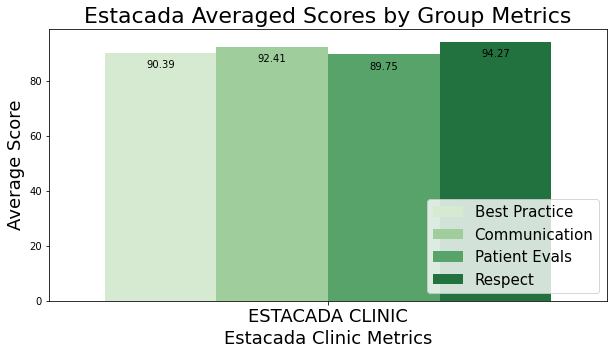

In [169]:
#Estacada Plot
plt.figure(figsize=[10, 5])

splot = sns.barplot(x="Location", y="Score", hue="Metric Group", data=ECA, palette='Greens')

plt.ylabel("Average Score", size =18)
plt.xlabel("Estacada Clinic Metrics", size=18)
plt.xticks(fontsize=18)
plt.title("Estacada Averaged Scores by Group Metrics", size=22)

plt.legend(loc=4, prop={'size':15})

for p in splot.patches:
    splot.annotate(format(round(p.get_height(),2), '0.2f'),
                  (p.get_x() + p.get_width() / 2., p.get_height()),
                  color='black', ha='center', va='center',
                  xytext=(0, -12),
                  textcoords='offset points')
    
plt.savefig('OrchidEstacadaClinicScores.png')
plt.show()